In [ ]:
"""
charged daughters angle analysis
@aurthor Jiancheng Zeng
@Nov 27 2022
"""

'\ncharged daughters angle analysis\n@aurthor Jiancheng Zeng\n@Nov 27 2022\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd
import math
import time
import glob
from itertools import chain
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [ ]:
"""
Select by name of the column
---------------------
"""
title = ["[0]eventID", "[1]trackID", "[2]parentID", "[3]particleID", "[4]copyNb1 (mother volume)", "[5]copyNb", "[6]material", "[7]time (ns)", "[8]energy(MeV)", "[9]energy deposit(MeV)", "[10]parent process name", "[11]process name", "[12]px (MeV/c)", "[13]py (MeV/c)", "[14]pz (MeV/c)", "[15]x (cm)", "[16]y (cm)", "[17]z (cm)"]

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = np.array(pd.read_table("/HDD/jiancheng/GRAMS/ToyModelData/geant11/GRAPS_stop_anti_He3_0_1500_1e6.dat"))    #get data file
#data = np.array(pd.read_table("/home/jiancheng/GRAMS/GRAMS_local/GRAMS_2021/output/processed_data/ORI_Product_proton_1e8_Ene_0_500/ORI_Product_proton_1e8_Ene_0_500_test.txt"))

"""
select analysis particle type
"""
Particle_Type = -1000020030    #[antiproton]-2212    [antideuteron]-1000010020    [antiHe3]-1000020030    [+/-muon]=+/-13    [+/-pion]=+/-211    [+/-kaon]=+/-321

"""
define functions
"""
#calculate angle in between 2 3D vectors
def ThreeD_angle (x1, y1, z1, x2, y2, z2):
    if(x2**2 + y2**2 + z2**2 == 0):
        return 0
    else:
        return math.degrees(math.acos((x1*x2 + y1*y2 + z1*z2)/(math.sqrt(x1**2 + y1**2 + z1**2)*math.sqrt(x2**2 + y2**2 + z2**2))))

print(data)
"""
Analyzed variables
"""
index = []    #Event number
Nevent = -1
Counting_Vector = []
N_muon = []
E_muon = []
A_muon = []
N_pion = []
E_pion = []
A_pion = []
N_kaon = []
E_kaon = []
A_kaon = []
N_Charged = []
Event_counting = 0
PeD_temp = []
#Files = glob.glob("/home/jiancheng/GRAMS/GRAMS_local/GRAMS_2021/output/processed_data/ORI_Product_proton_1e6_Ene_499_500/*")
#print(Files)
for n in range(1):
    #data = np.array(pd.read_table(Files[n]))
    #print("Modifing data file "+str(n+1)+"/"+str(len(Files)))
    for i in range(len(data[:,0])-1):
        Nevent = Nevent + 1
        if(data[i][0] != data[i+1][0]):
            for k in range(Nevent+1):
                if(str(data[i-Nevent+k][6]) == 'LAr' and float(data[i-Nevent+k][3]) == float(Particle_Type)):    #including stop events and annihilation in flight events
                    Event_counting = Event_counting + 1
                    event_in = 0    #temperary variable tracking first inner TOF hit point
                    event_out = 0    #temperary variable tracking first outer TOF hit point
                    tempin = 0    #temperary variable tracking inner TOF energy deposit
                    tempout = 0    #temperary variable tracking outer TOF energy deposit
                    muon = 0
                    muon_E = []
                    muon_A = []
                    pion = 0
                    pion_E = []
                    pion_A = []
                    kaon = 0
                    kaon_E = []
                    kaon_A = []
                    charged = 0
                    for m in range(Nevent+1):
                        if(int(data[i-Nevent+m][5]) == -10000 or int(data[i-Nevent+m][5]) == -10001 or int(data[i-Nevent+m][5]) == -10002 or int(data[i-Nevent+m][5]) == -10003 or int(data[i-Nevent+m][5]) == -10004 or int(data[i-Nevent+m][5]) == -10005 and float(data[i-Nevent+m][3]) == float(Particle_Type)):    #accumulate energy deposit inside outer TOF
                            if(int(data[i-Nevent+m-1][5]) != -10000 and int(data[i-Nevent+m-1][5]) != -10001 and int(data[i-Nevent+m-1][5]) != -10002 and int(data[i-Nevent+m-1][5]) != -10003 and int(data[i-Nevent+m-1][5]) != -10004 and int(data[i-Nevent+m-1][5]) != -10005 and data[i-Nevent+m][6] == 'Plastic'):    #find first outer TOF hit point
                                event_out = m
                                if(int(data[i-Nevent+m][5]) == -10002 or int(data[i-Nevent+m][5]) == -10003 or int(data[i-Nevent+m][5]) == -10004 or int(data[i-Nevent+m][5]) == -10005):    #find side hit distance from top info, if not applicable, this will be 0
                                    d_from_top = 170.0 - float(data[i-Nevent+m][17])
                            if(int(data[i-Nevent+m][5])==int(data[i-Nevent+event_out][5])):
                                tempout = tempout + float(data[i-Nevent+m][9])
                        if(int(data[i-Nevent+m][5]) == -11000 or int(data[i-Nevent+m][5]) == -11001 or int(data[i-Nevent+m][5]) == -11002 or int(data[i-Nevent+m][5]) == -11003 or int(data[i-Nevent+m][5]) == -11004 or int(data[i-Nevent+m][5]) == -11005 and float(data[i-Nevent+m][3]) == float(Particle_Type)):    #accumulate energy deposit inside inner TOF
                            if(int(data[i-Nevent+m-1][5]) != -11000 and int(data[i-Nevent+m-1][5]) != -11001 and int(data[i-Nevent+m-1][5]) != -11002 and int(data[i-Nevent+m-1][5]) != -11003 and int(data[i-Nevent+m-1][5]) != -11004 and int(data[i-Nevent+m-1][5]) != -11005 and data[i-Nevent+m][6] == 'Plastic'):    #find first inner TOF hit point
                                event_in = m
                            if(int(data[i-Nevent+m][5])==int(data[i-Nevent+event_in][5])):
                                tempin = tempin + float(data[i-Nevent+m][9])
                        if(int(data[i-Nevent+m][1]) != int(data[i-Nevent+m-1][1]) and tempin != 0 and tempout != 0):
                            #print(str(data[i-Nevent+m][3])+" for event"+str(int(data[i-Nevent+m][0])))
                            if(int(abs(data[i-Nevent+m][3])) == 13 or int(abs(data[i-Nevent+m][3])) == 211 or int(abs(data[i-Nevent+m][3])) == 321):
                                charged = charged + 1
                                if(int(abs(data[i-Nevent+m][3])) == 13):
                                    muon = muon + 1
                                    muon_E.append(data[i-Nevent+m][8])
                                    muon_A.append(ThreeD_angle(float(data[i-Nevent+event_in][15])-float(data[i-Nevent+event_out][15]), float(data[i-Nevent+event_in][16])-float(data[i-Nevent+event_out][16]), float(data[i-Nevent+event_in][17])-float(data[i-Nevent+event_out][17]), float(data[i-Nevent+m][12]), float(data[i-Nevent+m][13]), float(data[i-Nevent+m][14])))
                                if(int(abs(data[i-Nevent+m][3])) == 211):
                                    pion = pion + 1
                                    pion_E.append(data[i-Nevent+m][8])
                                    #pion_A.append(ThreeD_angle(0, 0, -1, float(data[i-Nevent+m][12]), float(data[i-Nevent+m][13]), float(data[i-Nevent+m][14])))
                                    pion_A.append(ThreeD_angle(float(data[i-Nevent+event_in][15])-float(data[i-Nevent+event_out][15]), float(data[i-Nevent+event_in][16])-float(data[i-Nevent+event_out][16]), float(data[i-Nevent+event_in][17])-float(data[i-Nevent+event_out][17]), float(data[i-Nevent+m][12]), float(data[i-Nevent+m][13]), float(data[i-Nevent+m][14])))
                                if(int(abs(data[i-Nevent+m][3])) == 321):
                                    kaon = kaon + 1
                                    kaon_E.append(data[i-Nevent+m][8])
                                    kaon_A.append(ThreeD_angle(float(data[i-Nevent+event_in][15])-float(data[i-Nevent+event_out][15]), float(data[i-Nevent+event_in][16])-float(data[i-Nevent+event_out][16]), float(data[i-Nevent+event_in][17])-float(data[i-Nevent+event_out][17]), float(data[i-Nevent+m][12]), float(data[i-Nevent+m][13]), float(data[i-Nevent+m][14])))
                        if(str(data[i-Nevent+m+1][6]) != 'LAr'):
                            PeD_temp.append(data[i-Nevent+k][17]-data[i-Nevent+m][17])
                    if(tempin != 0 and tempout != 0):
                        #print("one candidate event!\n")
                        if(muon != 0 or pion != 0 or kaon != 0):
                            index.append(int(data[i-Nevent+m][0]))
                            N_muon.append(muon)
                            E_muon.append(muon_E)
                            A_muon.append(muon_A)
                            N_pion.append(pion)
                            E_pion.append(pion_E)
                            A_pion.append(pion_A)
                            N_kaon.append(kaon)
                            E_kaon.append(kaon_E)
                            A_kaon.append(kaon_A)
                            N_Charged.append(charged)
                        Nevent = -1
                    break
            Nevent = -1
        print("File"+str(n+1)+" data process:"+str(int(100*i/len(data[:,0])))+"%", end='\r')

    print("\nFile%d identification:finished!"%(n+1))
print("all done!")

Reading data ...
[[1714 227 225 ... 126.172 41.1534 174.901]
 [1714 226 225 ... 122.601 54.8945 174.901]
 [1714 292 224 ... 186.13 61.3329 174.901]
 ...
 [999998 1423 3 ... 45.9398 -58.726 10.0953]
 [999998 1423 3 ... 45.94 -58.7258 10.0964]
 [999998 2 1 ... 45.7773 -60.3631 9.913]]


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Text(0.5, 1.0, '1528 charged secondaries in 998284 proton 500MeV events')

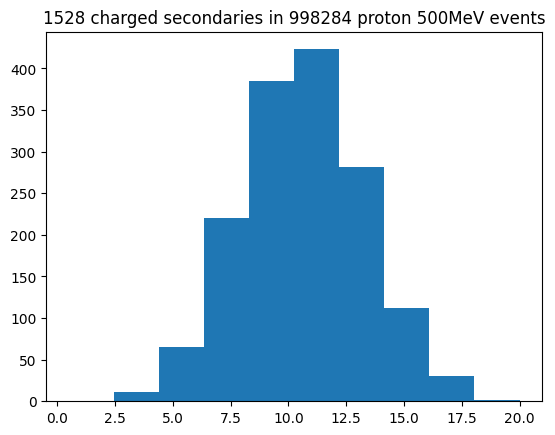

In [12]:
plt.hist(N_pion, bins=10, range=[0.5, 20])
plt.title("{} charged secondaries in {} proton 500MeV events".format(len(N_Charged), data[len(data)-1][0]-data[0][0]))

(array([1., 0., 0., 1., 0., 1., 1., 1., 2., 0., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.]),
 array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
         66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126.,
        132., 138., 144., 150., 156., 162., 168., 174., 180.]),
 <BarContainer object of 30 artists>)

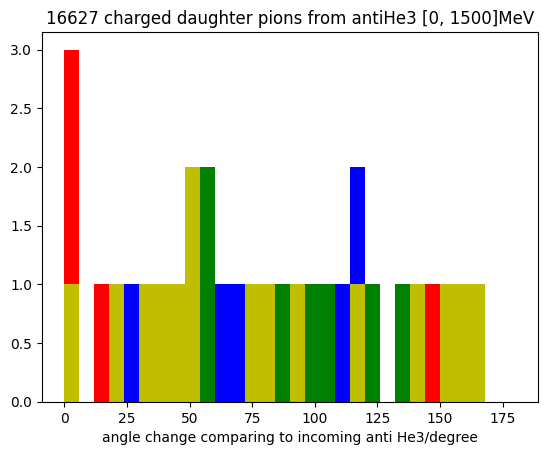

In [14]:
N_A_pion = list(chain.from_iterable(A_pion))
#plt.hist(N_A_pion, range = [0, 180], bins = 30)
plt.title("%d charged daughter pions from antiHe3 [0, 1500]MeV"%len(N_A_pion))
plt.xlabel("angle change comparing to incoming anti He3/degree")

plt.hist(A_pion[1], range = [0, 180], bins = 30, color = 'r')
plt.hist(A_pion[2], range = [0, 180], bins = 30, color = 'b')
plt.hist(A_pion[3], range = [0, 180], bins = 30, color = 'g')
plt.hist(A_pion[5], range = [0, 180], bins = 30, color = 'y')

Text(0.5, 0, 'depth in LArTPC/cm')

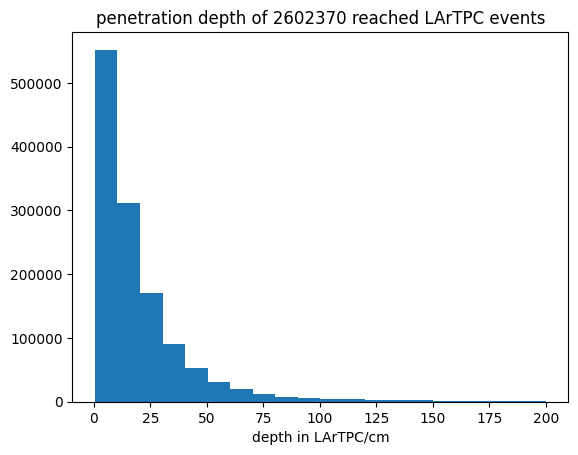

In [15]:
plt.hist(PeD_temp, range=[0.5, 200], bins=20)
plt.title("penetration depth of %d reached LArTPC events"%(len(PeD_temp)))
plt.xlabel("depth in LArTPC/cm")

Text(0.5, 0, 'energy/MeV')

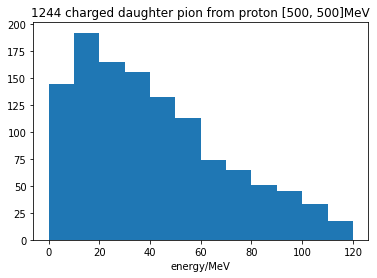

In [44]:
N_E_pion = list(chain.from_iterable(E_pion))
plt.hist(N_E_pion, range = [0, 120], bins = 12)
plt.title("%d charged daughter pion from proton [500, 500]MeV"%len(N_E_pion))
plt.xlabel("energy/MeV")

In [16]:
import corner
array1 = np.array(N_E_pion)
array2 = np.array(N_A_pion)
figure1 = corner.corner(array1, color='r')
figure2 = corner.corner(array2, color='b', fig=figure1)

ModuleNotFoundError: No module named 'corner'

Text(0.5, 0, 'energy/MeV')

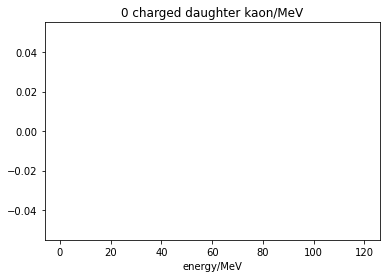

In [34]:
from itertools import chain
N_E_kaon = list(chain.from_iterable(E_kaon))
plt.hist(N_E_kaon, range = [0, 120], bins = 12)
plt.title("%d charged daughter kaon/MeV"%len(N_E_kaon))
plt.xlabel("energy/MeV")

In [136]:
print(N_kaon)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Text(0.5, 0, 'energy/MeV')

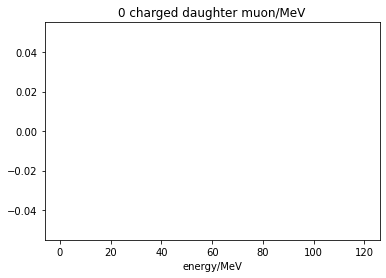

In [134]:
from itertools import chain
N_E_muon = list(chain.from_iterable(E_muon))
plt.hist(N_E_muon, range = [0, 120], bins = 12)
plt.title("%d charged daughter muon/MeV"%len(N_E_muon))
plt.xlabel("energy/MeV")

In [44]:
with open("/home/jiancheng/GRAMS/GRAMS_local/GRAMS_2021/output/analysis/test.txt", "w+") as file:
    content=str(Secondary_Product)
    file.write(content)
    file.close()

In [36]:
testfile = pd.read_table("/home/jiancheng/GRAMS/GRAMS_local/GRAMS_2021/output/analysis/test.txt")
print(testfile)

Empty DataFrame
Columns: [[[1000260540.0, 22.0, 2112.0, 22.0, 2112.0, 22.0, 22.0, 2212.0], [1000250540.0, 22.0, 22.0, 2112.0, 2212.0, 2212.0], [1000240510.0, 22.0, 22.0, 2112.0, 2112.0, 22.0, 22.0, 2212.0, 2212.0, 2112.0, 2212.0], [1000230490.0, 22.0, 22.0, 2112.0, 2112.0, 2112.0, 2112.0, 2212.0, 2212.0, 2212.0, 2212.0], [1000260550.0, 22.0, 22.0, 2212.0], [1000230490.0, 1000020030.0, 1000010020.0, 22.0, 22.0, 2112.0, 2112.0, 2212.0], [1000250530.0, 22.0, 22.0, 2112.0, 22.0, 2112.0, 2212.0], [1000240490.0, 2112.0, 22.0, 2112.0, 2112.0, 2112.0, 2112.0, 2212.0, 2212.0, 2212.0], [1000250530.0, 22.0, 22.0, 2112.0, 2112.0, 2212.0, 2212.0], [1000260530.0, 22.0, 22.0, 2212.0], [1000240530.0, 2112.0, 22.0, 22.0, 22.0, 2212.0, 2212.0], [1000260550.0, 22.0, 2112.0, 2212.0], [1000240510.0, 2112.0, 2112.0, 22.0, 2112.0, 2212.0, 2212.0, 2212.0], [1000200440.0, 22.0, 22.0, 22.0, 2112.0, 2112.0, 2112.0, 22.0, 2112.0, 2212.0, 2212.0, 2212.0, 2112.0, 2212.0, 2212.0, 2112.0, 2212.0], [1000260550.0, 22.0

115093


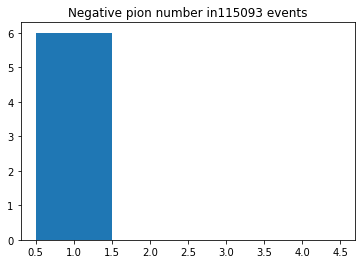

In [10]:
plt.hist(Negative_Pion, range=(0.5, 4.5), bins=4)
plt.title('Negative pion number in' + str(len(Init_Energy))+' events')
print(len(Init_Energy))

[3.55908, 23.1124, 22.3474, 26.9402, 10.2235, 7.25307, 75.861, 54.4946, 5.53429, 56.6929, 81.8406, 24.914, 19.4586, 61.3275, 21.0503, 40.5713, 29.2922, 34.534, 50.3036, 3.50937, 35.6421, 78.834, 33.0549, 40.8575, 24.0421, 19.5554]


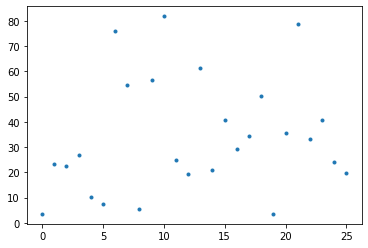

In [7]:
plt.plot(Pion_Energy, '.')
print(Pion_Energy)

In [ ]:
"""
modify data format
"""
index = array([float(i) for i in index])
time = array([float(i) for i in TOF_in_T]) - array([float(i) for i in TOF_out_T])
TOF_out_E = array([float(i) for i in TOF_out_E])
TOF_in_E = array([float(i) for i in TOF_in_E])
angle = array([float(i) for i in angle])
distance = array([float(i) for i in distance])
PeD = array([float(i) for i in PeD])
PeD_z = array([float(i) for i in PeD_z])
TOF_out_side = array([float(i) for i in TOF_out_side])
Init_Energy = array([float(i) for i in Init_Energy])
Stop_Events = array([float(i) for i in Stop_Events])
paddle_Out = array([float(i) for i in paddle_Out])
paddle_In = array([float(i) for i in paddle_In])

"""
Vector title: [0]Event number/[1]energy deposit on the outer TOF/[2]energy deposit on the inner TOF/[3]time in between TOF/·/[5]distance in between TOF/[6]distance travel inside LArTPC/[7]penetration depth on z/[8]distance on the side/[9]initial energy/[10]event type/[11]Outer TOF paddle/[12]Inner TOF paddle
"""
Result_Vector = np.array([index, TOF_out_E, TOF_in_E, time, angle, distance, PeD, PeD_z, TOF_out_side, Init_Energy, Stop_Events, paddle_Out, paddle_In]).transpose()

"""
Save analysis vector
"""
with open("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_He3_5e7_Ene_0_1500_vector.txt", "w") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, Result_Vector)
print("finished!")

In [ ]:
plt.hist(Init_Energy[Stop_Events==1], bins = 40, label = "%d events"%len(Init_Energy[Stop_Events==1]), color = 'b')

plt.title('Stop Events initial energy')
plt.xlabel('Energy/MeV')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

"""
print("Number of events less than 1.3m:"+str(len(PeD[PeD<130])/len(PeD)))
print("Number of events less than 1.2m:"+str(len(PeD[PeD<120])/len(PeD)))
print("Number of events less than 1.1m:"+str(len(PeD[PeD<110])/len(PeD)))
print("Number of events less than 1.0m:"+str(len(PeD[PeD<100])/len(PeD)))
print("Number of events less than 0.9m:"+str(len(PeD[PeD<90])/len(PeD)))
print("Number of events less than 0.8m:"+str(len(PeD[PeD<80])/len(PeD)))
print("Number of events less than 0.7m:"+str(len(PeD[PeD<70])/len(PeD)))
"""

In [ ]:
print(len(time))

## 